# Série Temporal

## Etapa 1: Importação e instalação das bibliotecas

In [141]:
!pip install pmdarima

In [142]:
# Importando as bibliotecas

import pandas as pd  # Pandas é uma biblioteca popular para manipulação e análise de dados
import numpy as np  # Numpy fornece suporte para arrays e operações matemáticas em grande escala
import matplotlib.pylab as plt  # Matplotlib é uma biblioteca de visualização poderosa em Python
from datetime import datetime  # O módulo datetime fornece classes para manipulação de datas e horas em Python
from statsmodels.tsa.seasonal import seasonal_decompose  # para decomposição de séries temporais em seus componentes sazonais, de tendência e residuais
from pmdarima.arima import auto_arima

# Etapa 2: Carregamento da base de dados

In [143]:
# Carregando a base de dados

dataset = pd.read_csv('/content/drive/MyDrive/datasets/AirPassengers.csv')

In [144]:
# Visualizando as 5 primeiras linhas da base de dados

dataset.head(1)

Month  #Passengers
0  1949-01          112

In [145]:
# Verificando estrutura da base de dados

dataset.shape

(144, 2)

In [146]:
# Convertendo a coluna Month que estava em string para o formato datetime

# definição de uma função lambda para analisar datas no formato 'YYYY-MM'
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

# leitura do arquivo CSV 'AirPassengers.csv' usando Pandas
# - 'parse_dates=['Month']': indica que a coluna 'Month' deve ser tratada como datas durante a leitura
# - 'index_col='Month'': define a coluna 'Month' como o índice do DataFrame resultante
# - 'date_parser=dateparse': usa a função 'dateparse' para analisar as datas na coluna 'Month'
dataset = pd.read_csv('/content/drive/MyDrive/datasets/AirPassengers.csv',
                      parse_dates=['Month'],
                      index_col='Month',
                      date_parser=dateparse)

In [147]:
# Visualizando as 5 primeiras linhas da base de dados após alteração

dataset.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [148]:
# Criando uma série temporal a partir do dataframe

time_series = dataset['#Passengers']
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

## Etapa 3: Exploração da série temporal

In [149]:
# Mostrando o valor no índice 1

time_series[1]

118

In [150]:
# Pegando a data que vem juntamente com o valor

time_series['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [151]:
# Outra forma é usar o padrão datetime

time_series[datetime(1949,2,1)]

118

In [152]:
# Intervalo de datas:

time_series['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [153]:
# Pegando do primeiro registro até a data digitada

time_series[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [154]:
# Mostrando somente do ano de 1950

time_series['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [155]:
# Valor máximo

time_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [156]:
# Valor mínimo

time_series.index.min()

Timestamp('1949-01-01 00:00:00')

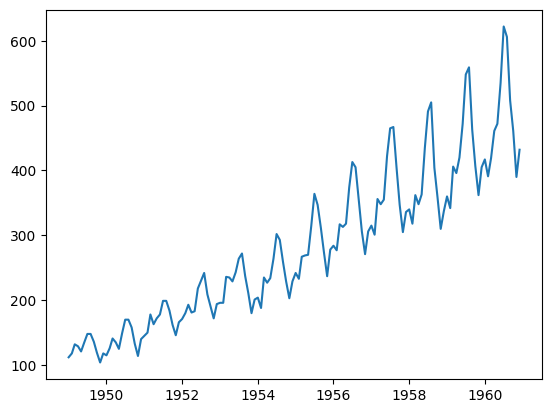

In [157]:
# Exibindo gráfico da série temporal

plt.plot(time_series)

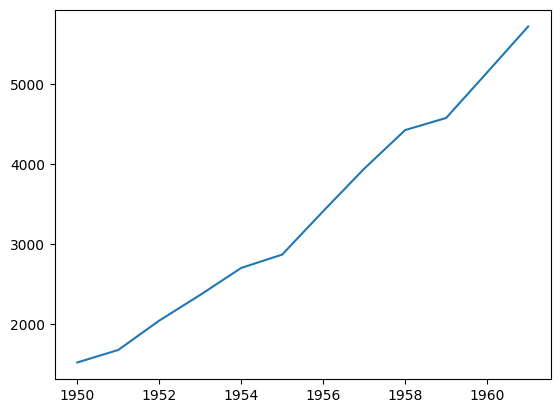

In [158]:
# Agrupamento por ano

time_series_ano = time_series.resample('A').sum()
plt.plot(time_series_ano)

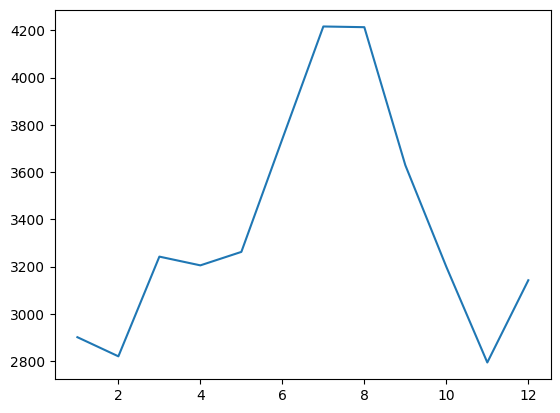

In [159]:
# Agrupamento por mês

time_series_mes = time_series.groupby([lambda x: x.month]).sum()
plt.plot(time_series_mes)

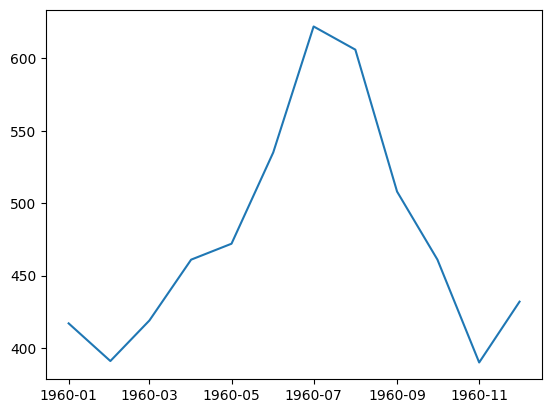

In [160]:
# Agrupamento por data

time_series_datas = time_series['1960-01-01':'1960-12-01']
plt.plot(time_series_datas)

## Etapa 4: Decomposição da série temporal

In [161]:
# Decomposição da série temporal em seus componentes: tendência, sazonalidade e aleatório
decomposicao = seasonal_decompose(time_series) # Aplica a decomposição sazonal à série temporal

# Extração dos componentes decompostos
tendencia = decomposicao.trend  # Obtém o componente de tendência da decomposição
sazonal = decomposicao.seasonal  # Obtém o componente sazonal da decomposição
aleatorio = decomposicao.resid  # Obtém o componente aleatória da decomposição

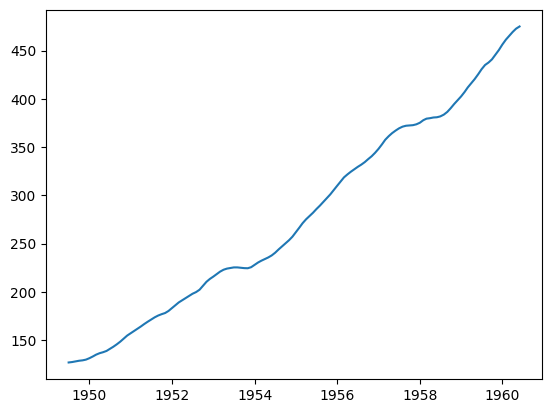

In [162]:
# Plotando a tendência

plt.plot(tendencia) # crescimento

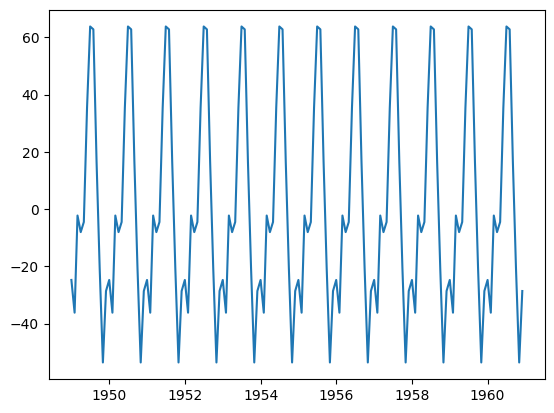

In [163]:
# Plotando gráfico sazonal

plt.plot(sazonal)

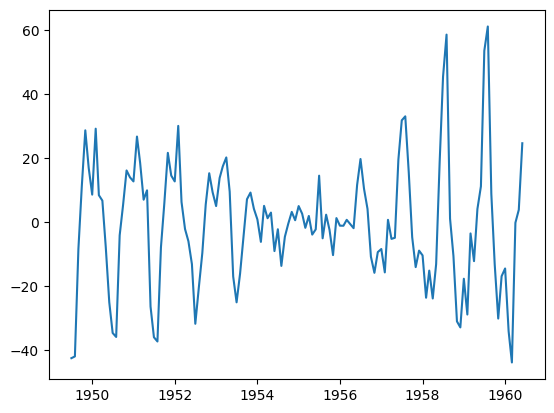

In [164]:
# Eventos que aconteceram em determinados tempos

plt.plot(aleatorio)

## Etapa 5: Previsões com ARIMA

In [165]:
# Criando modelo que vai fazer a revisão

# Parâmetors P, Q e D
model = auto_arima(time_series)

In [166]:
# Order escolhidas pelo algoritimo

model.order

(4, 1, 3)

In [167]:
# Fazendo previsão para valor x de anos(12 meses)

predictions = model.predict(n_periods=24)

In [168]:
# Mostrando previsões de passageiros

predictions

1961-01-01    467.573736
1961-02-01    490.494460
1961-03-01    509.136849
1961-04-01    492.554702
1961-05-01    495.305965
1961-06-01    475.947817
1961-07-01    476.339865
1961-08-01    475.552147
1961-09-01    472.353805
1961-10-01    483.889647
1961-11-01    475.570149
1961-12-01    485.921508
1962-01-01    479.133602
1962-02-01    480.987421
1962-03-01    482.221399
1962-04-01    476.211021
1962-05-01    483.942815
1962-06-01    475.847349
1962-07-01    482.794250
1962-08-01    479.011953
1962-09-01    479.518625
1962-10-01    482.449447
1962-11-01    476.973939
1962-12-01    483.511016
Freq: MS, dtype: float64

## Etapa 6 - Gráfico das previsões

In [169]:
# Quantidade de registros

len(time_series)

144

In [170]:
# Criando variável que recebo do primeiro até o 130 registro (base de treino)

train = time_series[:130]
train.shape

(130,)

In [171]:
# Data máxima e mínima da base de dados

train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [172]:
# Criando variável que recebe do 130 registro até o último (base de treino)

test = time_series[130:]
test.shape

(14,)

In [173]:
# Data máxima e mínima da base de dados

test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [174]:
# Treinando novo modelo

model2 = auto_arima(train, suppress_warnings=True) # passando base de treino
# suppress_warnings=True, não mostra os alertas

In [175]:
# Datas da base de teste

test.index

DatetimeIndex(['1959-11-01', '1959-12-01', '1960-01-01', '1960-02-01',
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [176]:
# Fazendo previsão do número de passageiros em cada mês

prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions'] # renomeando coluna
prediction

passengers_predictions
Month                             
1959-11-01              357.690511
1959-12-01              334.857449
1960-01-01              342.488592
1960-02-01              375.944534
1960-03-01              424.126300
1960-04-01              473.151468
1960-05-01              510.388415
1960-06-01              527.724284
1960-07-01              523.268370
1960-08-01              501.198802
1960-09-01              469.991493
1960-10-01              439.680418
1960-11-01              418.990050
1960-12-01              413.125647

In [177]:
# Valores reais

test

Month
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

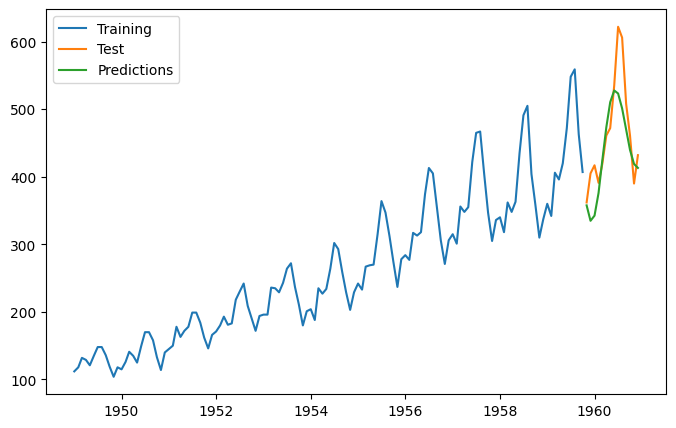

In [178]:
# Gráfico de comparação dos valores previstos e reais

plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();